<a href="https://colab.research.google.com/github/raghavendrapon/Data-Exploratory-Visualization/blob/main/Climate_Change_Data_Analysis(DEV_Mini_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
berkeleyearth_climate_change_earth_surface_temperature_data_path = kagglehub.dataset_download('berkeleyearth/climate-change-earth-surface-temperature-data')

print('Data source import complete.')


100%|██████████| 84.7M/84.7M [00:00<00:00, 195MB/s]

Extracting files...


Data source import complete.


# Exploratory Data Analysis in Global Warming trends: temperature rise over year

# <div style="background-color:#ffff8f; padding:10px;">1. Problem Statement</div>

- **Data Name** -- global warming trends: temperature rise over year
- Global warming has emerged as one of the most critical challenges of the 21st century, with rising temperatures significantly impacting ecosystems, weather patterns, and human society. Despite the vast availability of climate data, analyzing long-term temperature trends remains complex due to fragmented sources, varying time series lengths, and the need for reliable transformations. The Berkeley Earth Surface Temperature Study, with its extensive dataset of 1.6 billion temperature reports, provides an opportunity to systematically explore and visualize global and regional warming trends. This study seeks to perform exploratory data analysis (EDA) to highlight the rise in global temperatures over the years, offering transparent and data-driven insights into the progression of climate change.
- This EDA aims to illustrate the global warming and temperature trends on Earth.
<center><br><br>
<img src="https://climate.copernicus.eu/sites/default/files/custom-uploads/Global%20Climate%20Highlights%202023/Final%20Report/fig6_GCH2023_ERA5_SST_anomaly_monthly_2023_animation.gif"
width=%20 >
</center>




# <div style="background-color:#ffff8f; padding:10px;">2. Import Libraries</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy
from scipy.stats import spearmanr
import statistics
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.simplefilter("ignore")


# <div style="background-color:#ffff8f; padding:10px;">3. Loading Data</div>

In [4]:
Global_Temperature = pd.read_csv('/content/GlobalTemperatures.csv')
Temperature_Country = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv.zip')
Temperature_City = pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv.zip')

In [8]:
Global_Temperature.sample(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1025,1835-06-01,12.007,0.992,NaN,NaN,NaN,NaN,NaN,NaN
1562,1880-03-01,4.630,0.468,10.655,0.912,-1.814,0.796,14.273,0.186
2295,1941-04-01,8.575,0.240,14.429,0.240,2.616,0.257,15.407,0.114
2120,1926-09-01,12.075,0.242,17.816,0.231,6.150,0.255,16.222,0.120
2696,1974-09-01,11.744,0.135,17.430,0.180,6.140,0.220,16.197,0.065


In [6]:
Temperature_Country.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
65876,1852-06-01,16.826,0.862,Bhutan
219930,1980-04-01,24.360,0.329,Guatemala
406606,1930-02-01,24.117,0.393,Papua New Guinea
325184,1978-01-01,22.622,0.218,Mali
407208,1980-04-01,25.372,0.276,Papua New Guinea


In [7]:
Temperature_City.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
160362,2001-11-01,11.413,0.190,Nagoya,Japan,34.56N,136.22E
199158,1880-02-01,11.010,0.762,Santiago,Chile,32.95S,69.89W
224887,1975-06-01,24.801,0.343,Tangshan,China,37.78N,113.90E
64345,1895-05-01,34.737,0.552,Delhi,India,28.13N,77.27E
29469,1968-03-01,20.193,0.337,Bogotá,Colombia,4.02N,74.73W


# <div style="background-color: #ffff8f; padding:10px;">4. Data Description</div>
---

<br>

|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
| GlobalTemperatures| 3192 | 9 | 202 KB |
| GlobalLandTemperaturesByCountry| 577462 | 4 | 21 MB |
| GlobalLandTemperaturesByCity| 8599212 | 7 | 508 MB |

<br>

- The dataset consists of the following features:

<br>

|ID|Feature name|Feature description|
|:--|:--|:--|
|1|**dt** |Year/Month/Day|
|2|**LandAverageTemperature** |Global average land temperature in celsius |
|3|**LandAverageTemperatureUncertainty** | The 95% confidence interval around the average |
|4|**LandMaxTemperature** |Global average maximum land temperature in celsius  |
|5|**LandMaxTemperatureUncertainty** |The 95% confidence interval around the maximum land temperature |
|6|**LandMinTemperature** |Global average minimum land temperature in celsius |
|7|**LandMinTemperatureUncertainty** |The 95% confidence interval around the minimum land temperature  |
|8|**LandAndOceanAverageTemperature** |Global average land and ocean temperature in celsius |
|9|**LandAndOceanAverageTemperatureUncertainty** |The 95% confidence interval around the global average land and ocean temperature |
|10|**AverageTemperature** |Average Temperature by Country or City|
|11|**Country** |Country Name|
|12|**City** |City Name|
|13|**Latitude** |Latitude of the Country or City |
|14|**Longitude** |Longitude of the Country or City|

<br>



In [9]:
print("Global_Temperature size -->",Global_Temperature.shape)
print("Temperature_Country size -->",Temperature_Country.shape)
print("Temperature_City size -->",Temperature_City.shape)

Global_Temperature size --> (3192, 9)
Temperature_Country size --> (577462, 4)
Temperature_City size --> (239177, 7)


In [10]:
print("Feature of the Global_Temperature ---> \n\n" ,Global_Temperature.columns.tolist() , "\n")
print("Feature of the Temperature_Country ---> \n\n" ,Temperature_Country.columns.tolist() , "\n")
print("Feature of the Temperature_City ---> \n\n" ,Temperature_City.columns.tolist())

Feature of the Global_Temperature ---> 

 ['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'] 

Feature of the Temperature_Country ---> 

 ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'] 

Feature of the Temperature_City ---> 

 ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']


In [11]:
Global_Temperature.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [12]:
Global_Temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [17]:
Global_Temperature.isna().sum()

,0
dt,0
LandAverageTemperature,12
LandAverageTemperatureUncertainty,12
LandMaxTemperature,1200
LandMaxTemperatureUncertainty,1200
LandMinTemperature,1200
LandMinTemperatureUncertainty,1200
LandAndOceanAverageTemperature,1200
LandAndOceanAverageTemperatureUncertainty,1200


In [19]:
Temperature_Country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


# Distributions

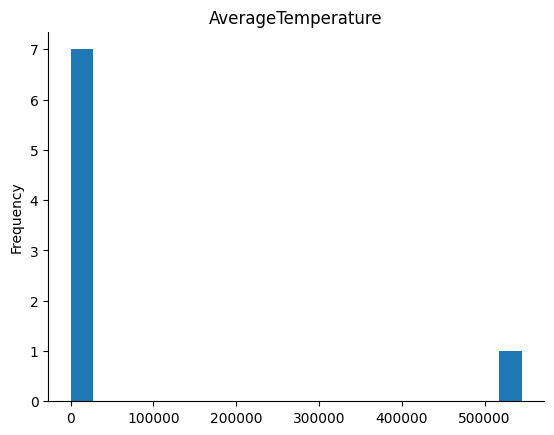

In [20]:
from matplotlib import pyplot as plt
_df_10['AverageTemperature'].plot(kind='hist', bins=20, title='AverageTemperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

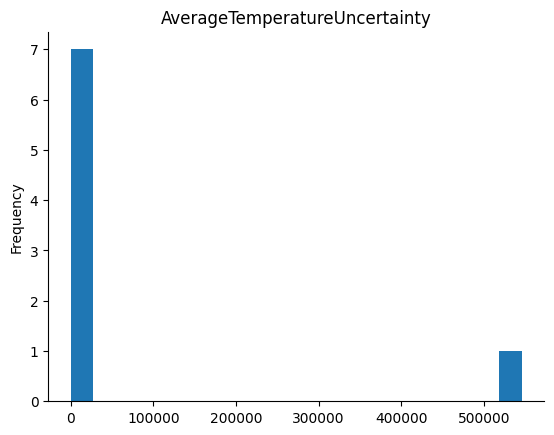

In [21]:
from matplotlib import pyplot as plt
_df_11['AverageTemperatureUncertainty'].plot(kind='hist', bins=20, title='AverageTemperatureUncertainty')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
Temperature_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [23]:
Temperature_Country.isna().sum()

,0
dt,0
AverageTemperature,32651
AverageTemperatureUncertainty,31912
Country,0


In [32]:
Temperature_City.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year,Month
count,228175.000000,228175.000000,228175.000000,228175.000000
mean,18.125969,0.969343,1913.893209,6.494761
std,10.024800,0.979644,62.025981,3.451441
min,-26.772000,0.040000,1743.000000,1.000000
25%,12.710000,0.340000,1869.000000,3.000000
50%,20.428000,0.592000,1918.000000,6.000000
75%,25.918000,1.320000,1966.000000,9.000000
max,38.283000,14.037000,2013.000000,12.000000


In [25]:
Temperature_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [26]:
Temperature_City.isna().sum()

,0
dt,0
AverageTemperature,11002
AverageTemperatureUncertainty,11002
City,0
Country,0
Latitude,0
Longitude,0



#### **Observations:**
##### **Global_Temperature Data** :
- The data set contains **3192** records with **9** features.

- There are **1 object data type** and **8 float64 data type** features.

- Total **7224 null values** are present in the data. 1200 each for LandMaxTemperature , La,ndMaxTemperatureUncertainty,LandMinTemperature , LandMinTemperatureUncertainty, LandAndOceanAverageTemperature , LandAndOceanAverageTemperatureUncertainty columns respectively.
Null values in the min or max column are typical since, among 365-day rows for each year, only one usually contains the specific year's min or max value, leaving other rows blank in that year for only min or max related column.

##### **Temperature_Country Data** :
- The data set contains **577462** records with **4** features.

- There are **2 object data type** and **2 float64 data type** features.

- Total **64563 null values** are present in the data . AverageTemperature column contains 32651 null values and rest belongs to AverageTemperatureUncertainty column.

##### **Temperature_City Data** :
- The data set contains **8599212** records with **7** features.

- There are **5 object data type** and **2 float64 data type** features.

- Total **728260 null values** are present in the data . Evenly distributed between the AverageTemperature and AverageTemperatureUncertainty columns.


# <div style="background-color:#ffff8f; padding:10px;">5. Data Cleaning</div>

##### **The analysis will rely on average values, and nulls cannot be substituted, as certain countries or cities lack any data in the average temperature column. Therefore, null rows in the average temperature column will be dropped.**

In [28]:
Temperature_City.dropna(axis= 0 , subset= ['AverageTemperature'] , inplace= True)
Temperature_Country.dropna(axis= 0 , subset=  ['AverageTemperature'] , inplace= True)

##### **Adding Year Column**

In [29]:
Global_Temperature['Year'] = pd.to_datetime(Global_Temperature['dt']).dt.year
Temperature_City['Year'] = pd.to_datetime(Temperature_City['dt']).dt.year
Temperature_Country['Year'] = pd.to_datetime(Temperature_Country['dt']).dt.year

##### **Adding Month Column**

In [30]:
Global_Temperature['Month'] = pd.to_datetime(Global_Temperature['dt']).dt.month
Temperature_City['Month'] = pd.to_datetime(Temperature_City['dt']).dt.month
Temperature_Country['Month'] = pd.to_datetime(Temperature_Country['dt']).dt.month

##### **Adding Season Column**

In [31]:
def season_name(month_number):
    seasons = {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    }
    return seasons.get(month_number)
Global_Temperature['Season'] = Global_Temperature['Month'].apply(season_name)


#####  **Adding Month Name Column**

In [33]:
def get_month_name(month_number):
    months = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    return months.get(month_number)

Global_Temperature['Month_Name'] = Global_Temperature['Month'].apply(get_month_name)


##### **Adding Century Column**

In [34]:
def get_century(year):
    century = (year - 1) // 100 + 1
    return century

Global_Temperature['Century'] = Global_Temperature['Year'].apply(get_century)
Temperature_City['Century'] = Temperature_City['Year'].apply(get_century)
Temperature_Country['Century'] = Temperature_Country['Year'].apply(get_century)


##### **Adding average Ocean Temperature column by subtracting LandAverageTemperature from LandAndOceanAverageTemperature**

In [35]:
Global_Temperature['OceanAverageTemperature'] = Global_Temperature['LandAndOceanAverageTemperature'] - Global_Temperature['LandAverageTemperature']

##### **Adding the coordinate values of Latitude and Longitude**

In [36]:
def lat_cor(x):
    if x[-1] == 'N' :
        return float(x[:-1])
    elif x[-1] == 'S' :
        return float("-" + x[:-1])
    else :
        return none
Temperature_City['Lat_Cor'] = Temperature_City['Latitude'].apply(lat_cor)

def lon_cor(x):
    if x[-1] == 'E':
        return float(x[:-1])
    elif x[-1] == 'W':
        return -float(x[:-1])
    else:
        return None
Temperature_City['Lon_Cor'] = Temperature_City['Longitude'].apply(lon_cor)

# <div style="background-color:#ffff8f; padding:10px;">6. Exploratory Data Analysis</div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature trend analysis throughout the 250 years :--**


In [37]:
fig = px.line(data_frame= Global_Temperature.groupby(['Year' , 'Month'])[['LandAverageTemperature','LandAverageTemperatureUncertainty']].mean().reset_index()
        , x = 'Year' , y = ['LandAverageTemperature','LandAverageTemperatureUncertainty'] ,
        title = 'Average Land Temperature and Average land Temperature Uncertainity trend over the years : -- ')
fig.update_layout(yaxis = dict(title_text = 'Temperature'), height = 500 ,width = 950)
fig.show()




<div style="background-color:lightblue; padding:10px;"> <ul><li>The line graph displays the trends of Average Land Temperature and Average Land Temperature Uncertainty between 1750 and 2015.</li>
<li>The highest Land Average Temperature was recorded in 1761, reaching 19 degrees Celsius, while the lowest temperature was noted in 1768 at -2.18 degrees Celsius.</li>
<li>Moreover, there is a notable decrease observed in the Average Land Temperature Uncertainty values over time. This decline suggests improved accuracy or reduced variability in temperature measurements throughout the duration.</li></ul></div>

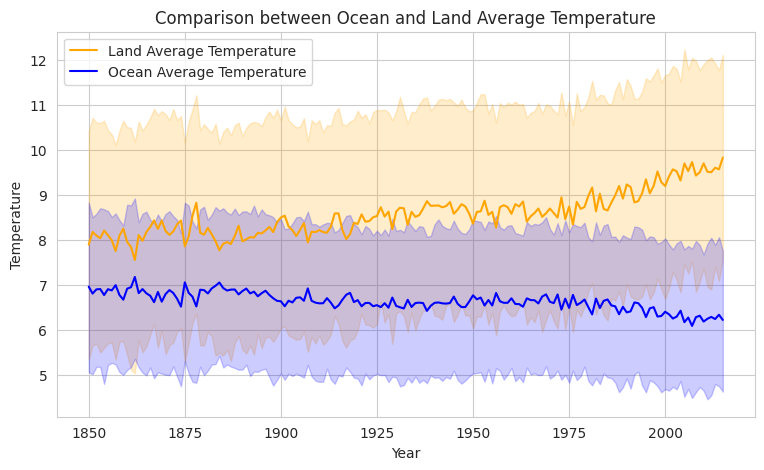

In [40]:
plt.figure(figsize=(9,5))
sns.lineplot(data=Global_Temperature.dropna(subset='OceanAverageTemperature'), y='LandAverageTemperature', x='Year', label='Land Average Temperature',color = 'orange')

sns.lineplot(data=Global_Temperature.dropna(subset='OceanAverageTemperature'), y='OceanAverageTemperature', x='Year', label='Ocean Average Temperature' , color = 'blue')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Comparison between Ocean and Land Average Temperature')

plt.legend()
sns.set_style("whitegrid")
plt.show()



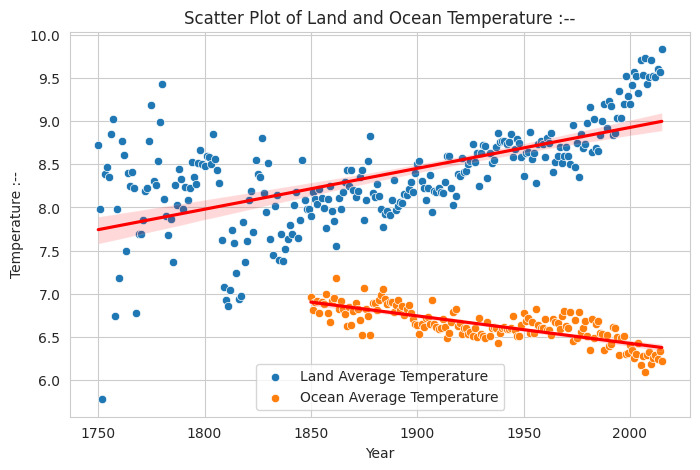

In [41]:
plt.figure(figsize=(8,5))
data_to_plot = Global_Temperature.groupby('Year')[['LandAverageTemperature' , 'OceanAverageTemperature']].mean().reset_index()
sns.scatterplot(data=data_to_plot, x='Year', y='LandAverageTemperature', label='Land Average Temperature')
sns.scatterplot(data=data_to_plot, x='Year', y='OceanAverageTemperature', label='Ocean Average Temperature')
sns.regplot(data=data_to_plot, x='Year', y='LandAverageTemperature'  , scatter=False, color='red')
sns.regplot(data=data_to_plot, x='Year', y='OceanAverageTemperature'  , scatter=False, color='red')
plt.ylabel("Temperature :--")
plt.title('Scatter Plot of Land and Ocean Temperature :--')
plt.show()

<div style="background-color:lightblue; padding:10px;">The Land Temperature over the past 250 years exhibits an upward, increasing trend. In contrast, Ocean temperatures in the last 150 years reveal a distinct decreasing trend.</div>

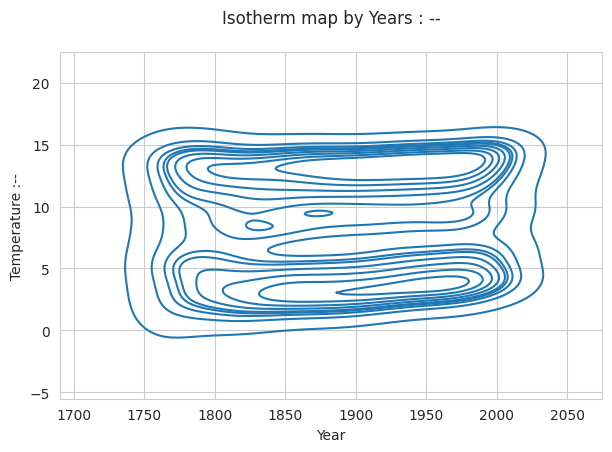

In [45]:
plt.figure(figsize=(7,4.5))
sns.kdeplot(data=Global_Temperature, x='Year', y='LandAverageTemperature')
plt.ylabel("Temperature :--")
plt.title("Isotherm map by Years : --\n")

sns.set_style("whitegrid")
plt.show()

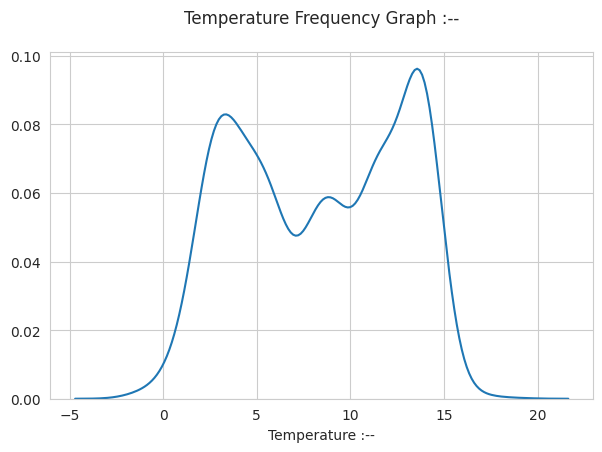

In [46]:
plt.figure(figsize=(7,4.5))
sns.kdeplot(data=Global_Temperature, x='LandAverageTemperature')
plt.xlabel("Temperature :--")
plt.ylabel('')
plt.title('Temperature Frequency Graph :--\n')

sns.set_style("whitegrid")
plt.show()

<div style="background-color:lightblue; padding:10px;"> <ul><li> The Isotherm map exhibits concentrated lines around 15 degrees Celsius, with additional clustering occurring between 0 to 5 degrees Celsius.</li>
<li>In the Temperature Frequency Graph, the median temperature registers at 15 degrees Celsius, while the second-highest frequency is observed between 0 to 5 degrees Celsius.</li>
<li>Collectively, both graphs suggest that the longest-running season corresponds to summer, characterized by temperatures hovering around 15 degrees Celsius. This is followed by winter, marked by temperatures ranging between 0 to 5 degrees Celsius.</li> </ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature's Correlation with Latitude and Longitude :--**


In [74]:
fig = px.choropleth(
    Temperature_Country.loc[Temperature_Country['Year'] == 2013, : ]
    .groupby('Country')['AverageTemperature'].mean().reset_index(),

    locations='Country',
    height=500, width=850,
    locationmode='country names',
    title='Average Temperature in 2013 by Countries : -- ',
    color='AverageTemperature',
    hover_name='Country',
    color_continuous_scale='RdBu_r'
)

fig.update_layout(title_x=0.5)
fig.show()

<div style="background-color:lightblue; padding:10px;"><ul><li>In 2013, all southern countries of North America, Africa, Oceania, Middle East Asia, South Asia, Southeast Asia, and some parts of Central Asia showcased notably higher average temperatures </li><li>Noticeabel thing is that the entire southern hemisphere displayed average temperatures higher than the global average, whereas the Northern hemisphere exhibited comparatively lower average temperatures.</li> </ul></div>



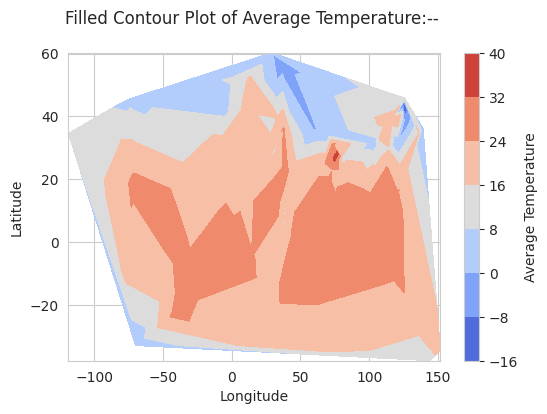

In [51]:
plt.figure(figsize=[6, 4])
contour = plt.tricontourf(
    Temperature_City['Lon_Cor'],
    Temperature_City['Lat_Cor'],
    Temperature_City['AverageTemperature'],
    cmap='coolwarm'   # 🔹 changed from 'YlOrRd'
)
plt.colorbar(contour, label='Average Temperature')
plt.title('Filled Contour Plot of Average Temperature:-- \n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<div style="background-color:lightblue; padding:10px;"> <ul><li> Temperature peaks between 20 degrees north and 20 degrees south, spanning from 150 degrees east to 70 degrees west. Beyond these latitudes, temperatures gradually decrease.</li>
<li> Furthermore, temperature starts declining past the 20-degree marks in both the northern and southern hemispheres.</li>
<li>The regions experiencing lower temperatures are situated approximately between 40 to 60 degrees north latitude and around 50 degrees east longitude.</li></ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature trend analysis throughout Centuries :--**


In [57]:
import plotly.express as px

fig = px.violin(
    Global_Temperature,
    y='LandAverageTemperature',
    x='Century',
    color='Century',
    box=True,   # adds inner boxplot
    points='all'  # shows all data points
)

fig.update_layout(
    title='Violin Plot of Land Average Temperature by Century :--',
    xaxis_title='Century',
    yaxis_title='Land Average Temperature',
    title_x=0.5
)

fig.show()


<div style="background-color:lightblue; padding:10px;"> <ul><li>The box plot of 18th century displays the widest temperature distribution among the 250 years analyzed. Interestingly, within this period, both the coldest day and the hottest hour were recorded.</li>
<li> Across the centuries, a noticeable trend emerges, showing a decrease in temperature distribution range. The 21st century stands out with the most compact temperature distribution.</li>
<li> Moreover, the median average temperature shows an increase over the centuries, with increments of approximately −0.557%, 8.866%, and 10.541% for the 19th, 20th, and 21st centuries, respectively.</li></ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature Trend Analysis by Seasons:--**


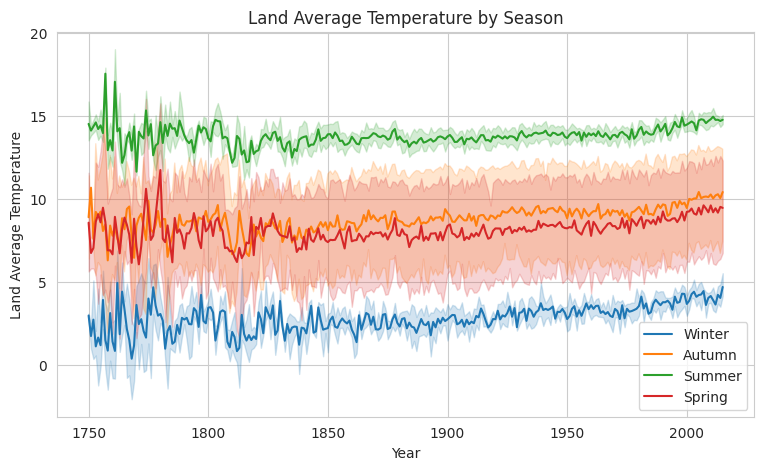

In [58]:
plt.figure(figsize=(9, 5))

sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Winter'], x='Year', y='LandAverageTemperature', markers=True, label='Winter')
sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Autumn'], x='Year', y='LandAverageTemperature', markers=True, label='Autumn')
sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Summer'], x='Year', y='LandAverageTemperature', markers=True, label='Summer')
sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Spring'], x='Year', y='LandAverageTemperature', markers=True, label='Spring')

plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
plt.title('Land Average Temperature by Season')

plt.legend()
sns.set_style("whitegrid")
plt.show()



<div style="background-color:lightblue; padding:10px;"> <ul><li> Over the course of 250 years, the summer season consistently demonstrates the highest temperature trends, typically ranging between 12 to 19 degrees Celsius. Following this, both Autumn and Spring exhibit temperature trends within the range of 8 to 11 degrees Celsius. Conversely, the winter season consistently displays the lowest temperature trends, ranging between 0 to 5 degrees Celsius.</li>
<li> Across the span of 250 years, all seasons exhibit a consistent upward trend in temperature.</li></ul></div>
    

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature Trend Analysis by Months :--**


In [60]:
fig = px.box(Global_Temperature, y='LandAverageTemperature', x='Month_Name', color='Month_Name', orientation='v' )
fig.update_layout( title='Vertical Box Plot of Land Average Temperature by Months :--',height = 600,width = 900,
    xaxis_title='Land Average Temperature', yaxis_title='Century' , title_x = 0.5)
fig.show()

In [61]:
fig = px.line(data_frame= Global_Temperature , x = 'Year' , y ='LandAverageTemperature' , color= 'Month_Name')
fig.update_layout(height = 500 , width = 800 , yaxis_title = "Average Temperature")
fig.show()

<div style="background-color:lightblue; padding:10px;"> <ul><li>  July consistently records the highest average temperature among all months over the 250-year period.</li>
<li>Conversely, January consistently showcases the lowest average temperature during this duration.</li>
<li>Additionally, an upward trend is observable across all months throughout these 250 years.</li> </ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Highest and Lowest Temperatured Cities and Countries and their Trend :--**


In [64]:
print('Top 5 Countries by Average Temperature in 21st century :--')
Temperature_Country.loc[Temperature_Country['Century'] == 21 , : ].groupby('Country')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = False).head(5)




Top 5 Countries by Average Temperature in 21st century :--


,Country,AverageTemperature
59,Djibouti,29.764500
134,Mali,29.358664
228,United Arab Emirates,29.149632
33,Burkina Faso,28.963197
191,Senegal,28.846612


In [63]:
print('Bottom 5 Countries by Average Temperature in 21st century :--')
Temperature_Country.loc[Temperature_Country['Century'] == 21 , : ].groupby('Country')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = True).head(5)



Bottom 5 Countries by Average Temperature in 21st century :--


,Country,AverageTemperature
87,Greenland,-16.798928
57,Denmark,-16.278395
209,Svalbard And Jan Mayen,-5.639908
179,Russia,-3.901796
38,Canada,-3.479059


<div style="background-color:lightblue; padding:10px;"> <ul><li>Among the top 5 highest-temperature countries, four are situated in Africa, all located in the Southern Hemisphere.</li>
<li> Conversely, within the top 5 lowest-temperature countries, two are in North America and one in Europe, all positioned in the Northern Hemisphere</li></ul></div>




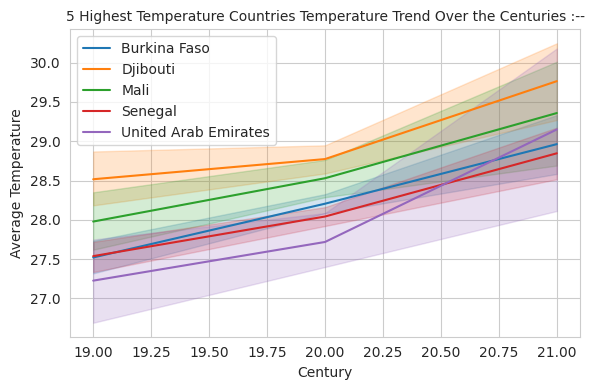

In [66]:
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=Temperature_Country.loc[Temperature_Country['Country'].isin(
        ['Djibouti', 'Mali', 'United Arab Emirates', 'Burkina Faso', 'Senegal']
    ), :],
    x='Century',
    y='AverageTemperature',
    hue='Country'
)
plt.title('5 Highest Temperature Countries Temperature Trend Over the Centuries :--',
          fontdict=dict(size=10))
plt.xlabel('Century')
plt.ylabel('Average Temperature')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

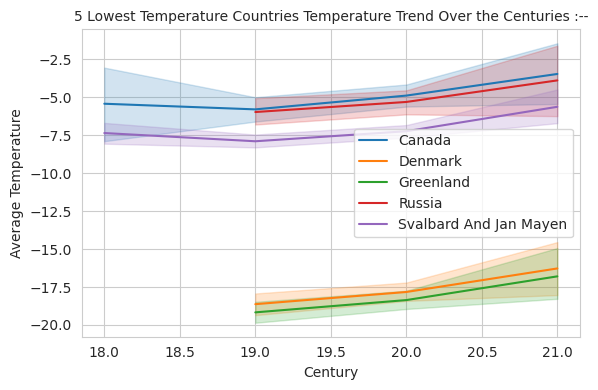

In [67]:
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=Temperature_Country.loc[Temperature_Country['Country'].isin(
        ['Greenland', 'Denmark', 'Svalbard And Jan Mayen', 'Russia', 'Canada']
    ), :],
    x='Century',
    y='AverageTemperature',
    hue='Country'
)
plt.title('5 Lowest Temperature Countries Temperature Trend Over the Centuries :--',
          fontdict=dict(size=10))
plt.xlabel('Century')
plt.ylabel('Average Temperature')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<div style="background-color:lightblue; padding:10px;"> <ul><li>An increasing temperature trend is evident in both high-temperature and low-temperature countries, signifying the impact of global warming.</li>
<li>Additionally, the 19th Century showcases the lowest temperatures observed in 250 years across both low-temperature and high-temperature countries.</li> </ul></div>

In [68]:
print('Top 5 Countries by Average Temperature in 21st century :--')
Temperature_City.loc[Temperature_City['Century'] == 21 , : ].groupby('City')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = False).head(5)



Top 5 Countries by Average Temperature in 21st century :--


,City,AverageTemperature
97,Umm Durman,30.010243
57,Madras,29.229566
42,Jiddah,28.711250
63,Mogadishu,27.977059
8,Bangkok,27.961612


In [69]:
print('Bottom 5 Countries by Average Temperature in 21st century :--')
Temperature_City.loc[Temperature_City['Century'] == 21 , : ].groupby('City')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = True).head(5)



Bottom 5 Countries by Average Temperature in 21st century :--


,City,AverageTemperature
34,Harbin,4.910105
79,Saint Petersburg,5.330914
65,Moscow,5.702888
64,Montreal,6.115346
19,Changchun,6.192875


#### <div style="background-color:#c6fcc7 ; padding:10px;">**Average Land Temperature Prediction:--**


In [71]:
Temperature_Prediction = Global_Temperature[["dt" , "LandAverageTemperature"]]
Temperature_Prediction.set_index('dt', inplace=True)
model = ARIMA(Temperature_Prediction['LandAverageTemperature'], order=(2, 1, 5))  # Best fit
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)  # 12 months
print("Forecast for the next 1 year:")
print(forecast)

Forecast for the next 1 year:
2016-01-01     3.956802
2016-02-01     4.323299
2016-03-01     6.079981
2016-04-01     8.771524
2016-05-01    11.607242
2016-06-01    13.828157
2016-07-01    14.841564
2016-08-01    14.379203
2016-09-01    12.568260
2016-10-01     9.896408
2016-11-01     7.080482
2016-12-01     4.874165
Freq: MS, Name: predicted_mean, dtype: float64


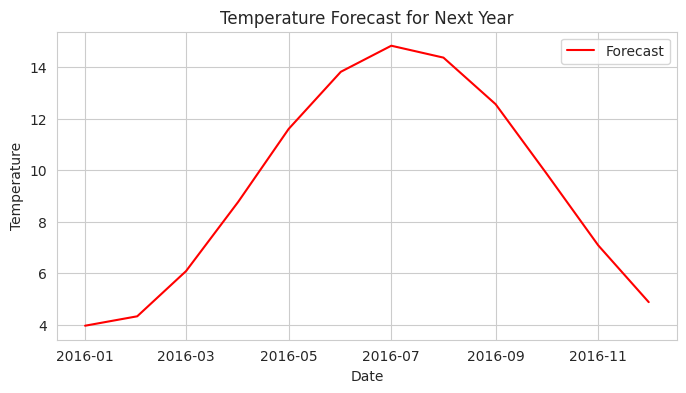

In [72]:
plt.figure(figsize=(8, 4))
plt.plot(forecast.reset_index()["index"], forecast.reset_index()['predicted_mean'], color='red', linestyle='-', label='Forecast')
plt.title('Temperature Forecast for Next Year')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# <div style="background-color:#ffff8f; padding:10px;">7. Conclusion</div>


**Temperature Trends by Season and Month:**
- Over 250 years, summer consistently displayed the highest temperatures (12 to 19°C), followed by Autumn and Spring (8 to 11°C), while Winter consistently had the lowest temperatures (0 to 5°C).

**Centennial Temperature Trends:**
- The 18th century depicted the widest temperature distribution, marking both the coldest day and hottest hour.
- Temperature range decreased across centuries, with the 21st century displaying the most compact distribution.
- Median average temperatures increased by approximately −0.557%, 8.866%, and 10.541% for the 19th, 20th, and 21st centuries, respectively.

**Seasonal Temperature Trends:**
- A consistent upward trend was observed in temperatures across all seasons over 250 years.
- July consistently recorded the highest average temperature, while January displayed the lowest average temperature.

**Hemispheric Temperature Variations:**
- In 2013, southern regions of North America, Africa, Oceania, Middle East Asia, South Asia, Southeast Asia, and parts of Central Asia showed notably higher average temperatures. The entire southern hemisphere had temperatures higher than the global average, contrasting with relatively lower temperatures in the Northern hemisphere.

**Global Warming Impact:**
- The analysis revealed an increasing temperature trend in both high and low-temperature countries, indicative of the pervasive impact of global warming across diverse geographical regions. This consistent rise in temperatures underscores the overarching influence of climate change, affecting various regions and climates worldwide.